In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf




In [17]:
images = []
ages = []
genders = []

directory = 'C:\\Users\\user\\final1\\crop_part1'

for i in os.listdir(directory)[0:8000]:
    split = i.split('_')
    ages.append(int(split[0]))
    genders.append(int(split[1]))
    images.append(Image.open(os.path.join(directory, i)))

In [18]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')
genders = pd.Series(list(genders), name = 'Genders')

df = pd.concat([images, ages, genders], axis=1)
df

Images  Ages  Genders
0     <PIL.JpegImagePlugin.JpegImageFile image mode=...   100        1
1     <PIL.JpegImagePlugin.JpegImageFile image mode=...   100        1
2     <PIL.JpegImagePlugin.JpegImageFile image mode=...   101        1
3     <PIL.JpegImagePlugin.JpegImageFile image mode=...    10        0
4     <PIL.JpegImagePlugin.JpegImageFile image mode=...    10        0
...                                                 ...   ...      ...
7995  <PIL.JpegImagePlugin.JpegImageFile image mode=...    63        1
7996  <PIL.JpegImagePlugin.JpegImageFile image mode=...    63        1
7997  <PIL.JpegImagePlugin.JpegImageFile image mode=...    63        1
7998  <PIL.JpegImagePlugin.JpegImageFile image mode=...    63        1
7999  <PIL.JpegImagePlugin.JpegImageFile image mode=...    63        1

[8000 rows x 3 columns]

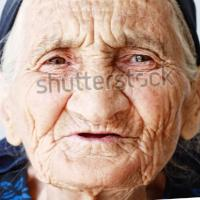

100 1


In [19]:
display(df['Images'][0])
print(df['Ages'][0], df['Genders'][0])

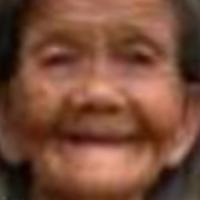

100 1


In [20]:
display(df['Images'][1])
print(df['Ages'][1], df['Genders'][1])

C:\Users\user\AppData\Local\Temp\ipykernel_10164\409036286.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=30)


<Axes: xlabel='Ages', ylabel='Density'>

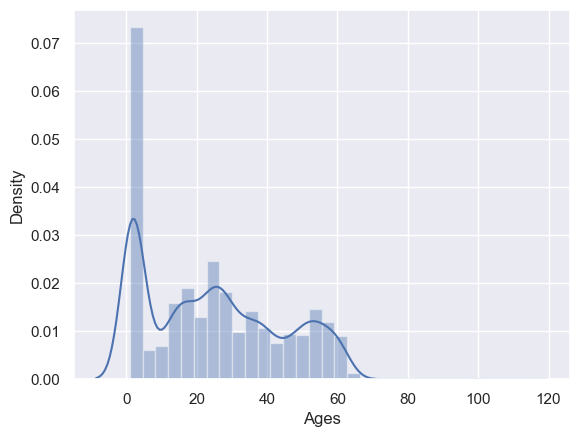

In [21]:
sns.set_theme()
sns.distplot(df['Ages'],kde=True, bins=30)

In [22]:
under4s = []

for i in range(len(df)):
    if df['Ages'].iloc[i] <= 4:
        under4s.append(df.iloc[i])
under4s = pd.DataFrame(under4s)
under4s = under4s.sample(frac=0.3)

df = df[df['Ages'] > 4]

df = pd.concat([df, under4s], ignore_index = True)

C:\Users\user\AppData\Local\Temp\ipykernel_10164\1853336140.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=30)


<Axes: xlabel='Ages', ylabel='Density'>

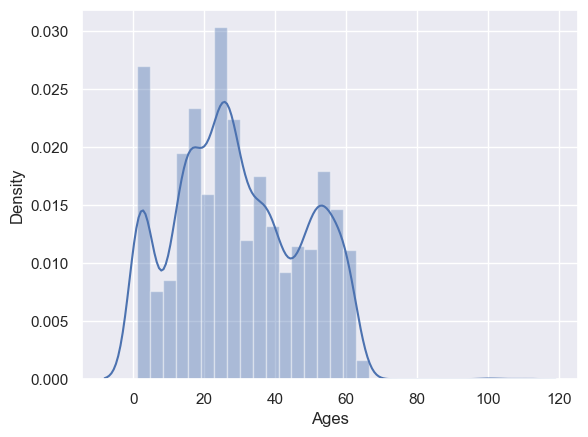

In [23]:
sns.distplot(df['Ages'],kde=True, bins=30)


C:\Users\user\AppData\Local\Temp\ipykernel_10164\1224246209.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=20)


<Axes: xlabel='Ages', ylabel='Density'>

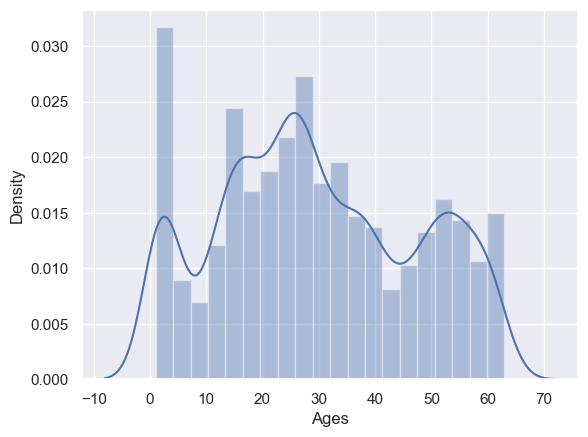

In [24]:
df = df[df['Ages'] < 80]
sns.distplot(df['Ages'],kde=True, bins=20)


<Axes: xlabel='Genders', ylabel='count'>

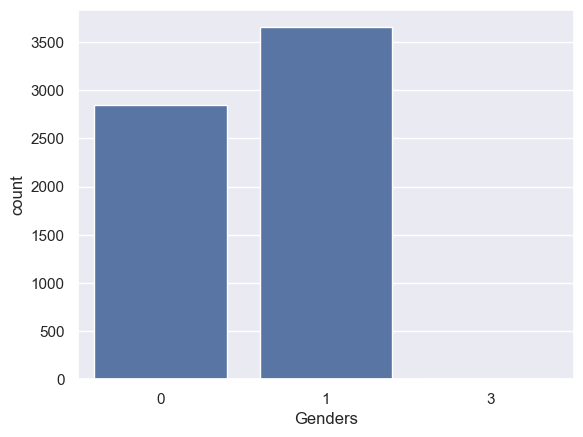

In [25]:
sns.countplot(data=df, x='Genders')


In [26]:
x = []
y = []

for i in range(len(df)):
    resized_image = df['Images'].iloc[i].resize((200, 200))
    ar = np.asarray(df['Images'].iloc[i])
    x.append(ar)
    agegen = [int(df['Ages'].iloc[i]), int(df['Genders'].iloc[i])]
    y.append(agegen)
x = np.array(x)

In [27]:
y_age = df['Ages']
y_gender = df['Genders']

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)
# Check the distribution of classes in y_gender
# Filter x along with y_gender
x_filtered = x[y_gender != 3]
y_gender_filtered = y_gender[y_gender != 3]

# Perform stratified splitting after handling imbalance
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x_filtered, y_gender_filtered, test_size=0.2, stratify=y_gender_filtered)


In [28]:


# Define age model
agemodel = Sequential()
agemodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(64, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(128, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Flatten())
agemodel.add(Dense(64, activation='relu'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(1, activation='relu'))

agemodel.compile(loss='mean_squared_error',
                 optimizer=optimizers.Adam(learning_rate=0.0001))

# Define gender model
genmodel = Sequential()
genmodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(64, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(128, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Flatten())
genmodel.add(Dense(64, activation='relu'))
genmodel.add(Dropout(0.5))
genmodel.add(Dense(1, activation='sigmoid'))

genmodel.compile(loss='binary_crossentropy',
                 optimizer=optimizers.Adam(learning_rate=0.0001),
                 metrics=['accuracy'])


In [29]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)
train1 = datagen.flow(x_train_age, y_train_age, batch_size=32)
test1 = test_datagen.flow(
        x_test_age, y_test_age,
        batch_size=32)
history1 = agemodel.fit(train1, epochs=50, shuffle=True, validation_data=test1)


Epoch 1/50
163/163 [==============================] - 117s 709ms/step - loss: 414.6409 - val_loss: 321.5800
Epoch 2/50
163/163 [==============================] - 116s 709ms/step - loss: 343.6422 - val_loss: 295.6552
Epoch 3/50
163/163 [==============================] - 115s 708ms/step - loss: 313.9794 - val_loss: 280.1237
Epoch 4/50
163/163 [==============================] - 114s 699ms/step - loss: 283.5213 - val_loss: 249.2161
Epoch 5/50
163/163 [==============================] - 112s 689ms/step - loss: 269.0481 - val_loss: 218.0171
Epoch 6/50
163/163 [==============================] - 115s 705ms/step - loss: 254.0390 - val_loss: 219.5758
Epoch 7/50
163/163 [==============================] - 117s 714ms/step - loss: 246.9460 - val_loss: 201.5427
Epoch 8/50
163/163 [==============================] - 115s 705ms/step - loss: 247.4989 - val_loss: 215.0084
Epoch 9/50
163/163 [==============================] - 115s 708ms/step - loss: 238.0857 - val_loss: 195.8965
Epoch 10/50
163/163 [=======

In [30]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train2 = datagen.flow(x_train_gender, y_train_gender, batch_size=64)

test2 = test_datagen.flow(
        x_test_gender, y_test_gender,
        batch_size=64)

history2 = genmodel.fit(train2, epochs=50, shuffle=True, validation_data=test2)

Epoch 1/50
82/82 [==============================] - 105s 1s/step - loss: 0.6414 - accuracy: 0.6349 - val_loss: 0.5701 - val_accuracy: 0.7018
Epoch 2/50
82/82 [==============================] - 105s 1s/step - loss: 0.5895 - accuracy: 0.6931 - val_loss: 0.5212 - val_accuracy: 0.7540
Epoch 3/50
82/82 [==============================] - 104s 1s/step - loss: 0.5568 - accuracy: 0.7202 - val_loss: 0.4843 - val_accuracy: 0.7656
Epoch 4/50
82/82 [==============================] - 103s 1s/step - loss: 0.5270 - accuracy: 0.7468 - val_loss: 0.4419 - val_accuracy: 0.8040
Epoch 5/50
82/82 [==============================] - 104s 1s/step - loss: 0.4985 - accuracy: 0.7722 - val_loss: 0.4168 - val_accuracy: 0.8009
Epoch 6/50
82/82 [==============================] - 103s 1s/step - loss: 0.4899 - accuracy: 0.7758 - val_loss: 0.4235 - val_accuracy: 0.8094
Epoch 7/50
82/82 [==============================] - 102s 1s/step - loss: 0.4740 - accuracy: 0.7837 - val_loss: 0.4250 - val_accuracy: 0.8017
Epoch 8/50
82

In [31]:
def process_and_predict(file):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((200, 200), Image.BILINEAR)
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left,top,right,bottom))
            im = im.resize((200, 200), Image.BILINEAR)
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left,top,right,bottom))
            im = im.resize((200, 200), Image.BILINEAR)
            
    ar = np.asarray(im)
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 200, 200, 3)
    
    age = agemodel.predict(ar)
    gender = np.round(genmodel.predict(ar))
    if gender == 0:
        gender = 'male'
    elif gender == 1:
        gender = 'female'
        
    print('Age:', int(age), '\n Gender:', gender)
    return im.resize((300, 300), Image.BILINEAR)

1/1 [==============================] - 0s 55ms/step
Age: 14 
 Gender: female


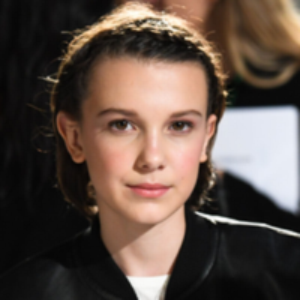

In [33]:
process_and_predict(r"C:\Users\user\final1\testImage\13.jpg")

1/1 [==============================] - 0s 57ms/step
Age: 15 
 Gender: female


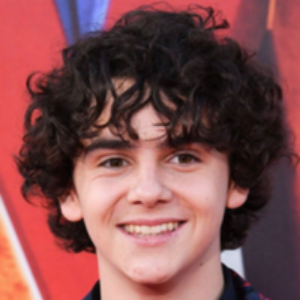

In [34]:
process_and_predict(r"C:\Users\user\final1\testImage\14.jpg")

1/1 [==============================] - 0s 62ms/step
Age: 23 
 Gender: female


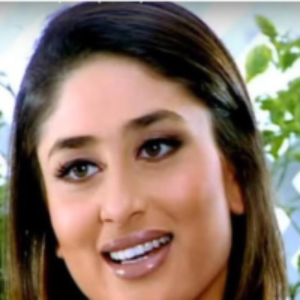

In [35]:
process_and_predict(r"C:\Users\user\final1\testImage\22.jpg")

1/1 [==============================] - 0s 56ms/step
Age: 34 
 Gender: male


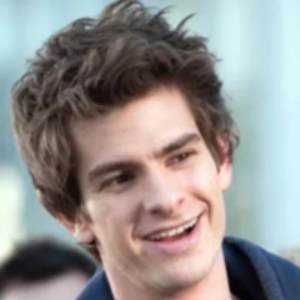

In [36]:
process_and_predict(r"C:\Users\user\final1\testImage\29.jpg")

1/1 [==============================] - 0s 63ms/step
Age: 48 
 Gender: male


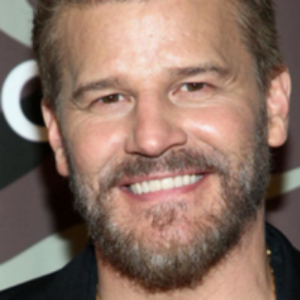

In [37]:
process_and_predict(r"C:\Users\user\final1\testImage\64.jpg")

1/1 [==============================] - 0s 55ms/step
Age: 14 
 Gender: female


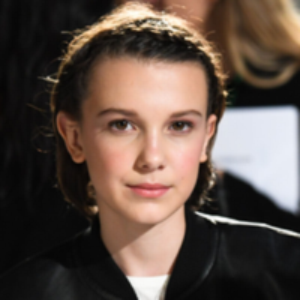

In [38]:
process_and_predict(r"C:\Users\user\final1\testImage\13.jpg")

1/1 [==============================] - 0s 54ms/step
Age: 14 
 Gender: male


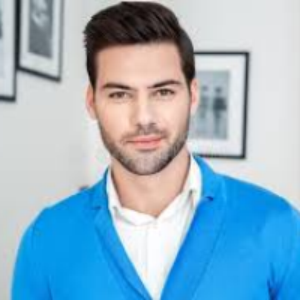

In [39]:
process_and_predict(r"C:\Users\user\final1\testImage\25.jpg")

1/1 [==============================] - 0s 58ms/step
Age: 18 
 Gender: female


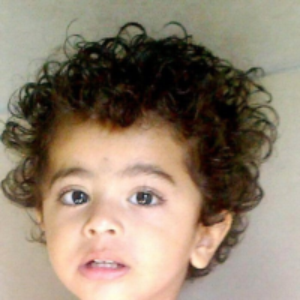

In [57]:
process_and_predict(r"C:\Users\user\final1\testImage\8.jpeg")

1/1 [==============================] - 0s 55ms/step
Age: 24 
 Gender: female


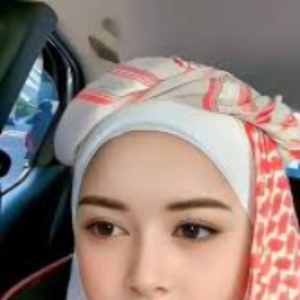

In [59]:
process_and_predict(r"C:\Users\user\final1\testImage\16.jpg")

1/1 [==============================] - 0s 64ms/step
Age: 24 
 Gender: male


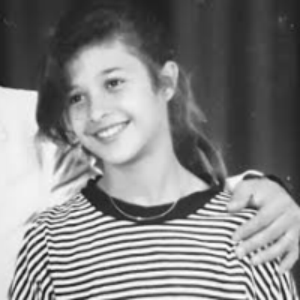

In [60]:
process_and_predict(r"C:\Users\user\final1\testImage\17.jpg")

1/1 [==============================] - 0s 38ms/step
Age: 23 
 Gender: female


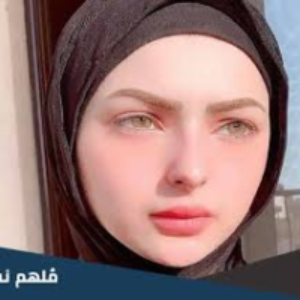

In [62]:
process_and_predict(r"C:\Users\user\final1\testImage\26.jpg")

1/1 [==============================] - 0s 63ms/step
Age: 29 
 Gender: male


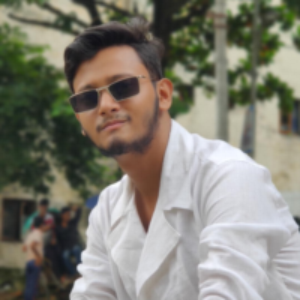

In [65]:
process_and_predict(r"C:\Users\user\final1\testImage\27.jpeg")

1/1 [==============================] - 0s 67ms/step
Age: 39 
 Gender: male


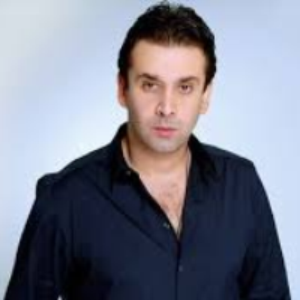

In [67]:
process_and_predict(r"C:\Users\user\final1\testImage\28.jpg")

1/1 [==============================] - 0s 63ms/step
Age: 16 
 Gender: female


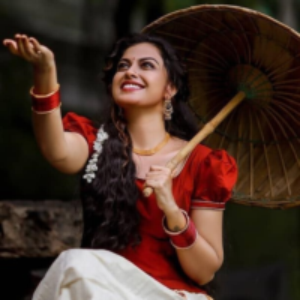

In [69]:
process_and_predict(r"C:\Users\user\final1\testImage\30.jpeg")

1/1 [==============================] - 0s 63ms/step
Age: 32 
 Gender: male


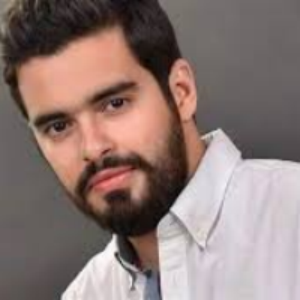

In [70]:
process_and_predict(r"C:\Users\user\final1\testImage\30.jpg")

1/1 [==============================] - 0s 61ms/step
Age: 31 
 Gender: female


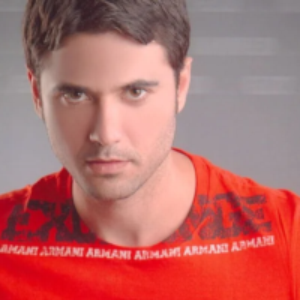

In [71]:
process_and_predict(r"C:\Users\user\final1\testImage\30M.jpg")

1/1 [==============================] - 0s 57ms/step
Age: 23 
 Gender: male


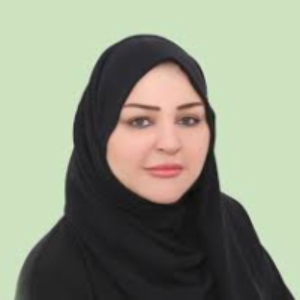

In [72]:
process_and_predict(r"C:\Users\user\final1\testImage\33.jpg")

1/1 [==============================] - 0s 58ms/step
Age: 25 
 Gender: male


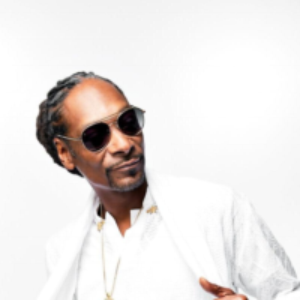

In [99]:
process_and_predict(r"C:\Users\user\final1\testImage\35.jpeg")

1/1 [==============================] - 0s 54ms/step
Age: 27 
 Gender: male


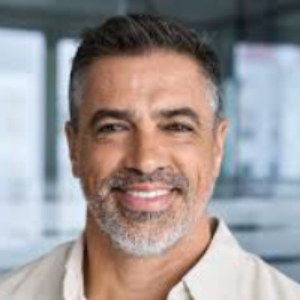

In [78]:
process_and_predict(r"C:\Users\user\final1\testImage\40.jpg")

1/1 [==============================] - 0s 60ms/step
Age: 33 
 Gender: male


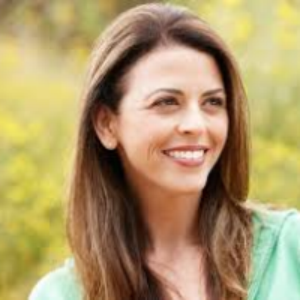

In [79]:
process_and_predict(r"C:\Users\user\final1\testImage\40w.jpg")

1/1 [==============================] - 0s 65ms/step
Age: 24 
 Gender: female


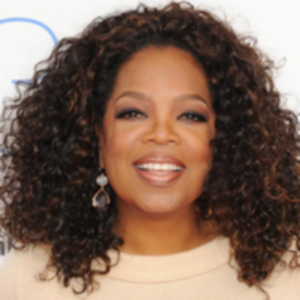

In [80]:
process_and_predict(r"C:\Users\user\final1\testImage\42.jpg")

1/1 [==============================] - 0s 58ms/step
Age: 28 
 Gender: male


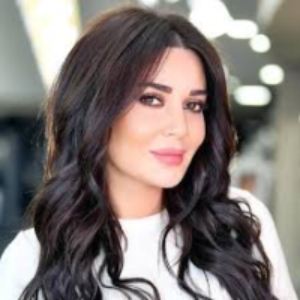

In [81]:
process_and_predict(r"C:\Users\user\final1\testImage\42w.jpg")

1/1 [==============================] - 0s 61ms/step
Age: 17 
 Gender: male


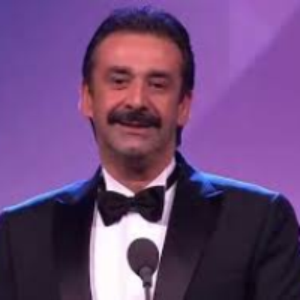

In [82]:
process_and_predict(r"C:\Users\user\final1\testImage\47.jpg")

1/1 [==============================] - 0s 63ms/step
Age: 20 
 Gender: male


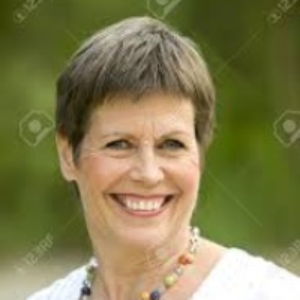

In [84]:
process_and_predict(r"C:\Users\user\final1\testImage\60.jpg")

1/1 [==============================] - 0s 58ms/step
Age: 58 
 Gender: male


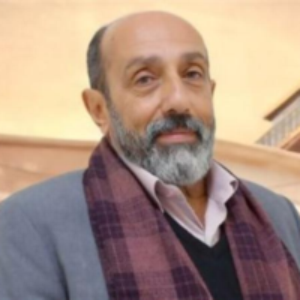

In [85]:
process_and_predict(r"C:\Users\user\final1\testImage\62.jpg")

1/1 [==============================] - 0s 55ms/step
Age: 31 
 Gender: male


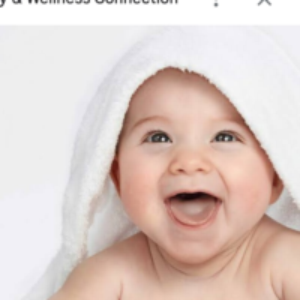

In [98]:
process_and_predict(r"C:\Users\user\final1\testImage\baby1.jpg")